In [1]:
#!/usr/bin/env python
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
pd.set_option('display.max_rows', None)

In [2]:
# Reading data
filename = 'KTUS.csv'

In [3]:
# Read the data into a pandas dataframe, and define columns, header and index
df = pd.read_csv(filename, sep = ',',index_col='Date_Time',skiprows=7,
        names =['Station_ID','Date_Time',
                'air_temp_set_1_F','dew_point_temperature_set_1_F','precip_accum_one_hour_set_1_Inches',
                'dew_point_temperature_set_1d_F'])

# Rename columns, and index
df.columns = ['Station_ID','Air_Temp_F','Dewpoint_Temp_F','Precip_1Hour_Accum_Inches',
                'Dewpoint_Temp_set2_F']

# Set index data type to a DateTime object
df.index = pd.to_datetime(df.index)

In [4]:
# Make numpy lists of the data
Hour       = df.index.hour.tolist()
Station_ID = df.Station_ID.values.tolist()
Air_Temp_F = df.Air_Temp_F.values.tolist()
Precip_1Hour_Accum_Inches = df.Precip_1Hour_Accum_Inches.values.tolist()
Dewpoint_Temp_F = df.Dewpoint_Temp_set2_F.values.tolist()

In [5]:
# Calculating some basic properites
print(min(Air_Temp_F)) # np.min(Air_Temp_F) or Air_Temp_F.min()
print(max(Air_Temp_F)) # np.max(Air_Temp_F) or Air_Temp_F.max()
print(np.mean(Air_Temp_F))
print(np.std(Air_Temp_F))
print(stats.skew(Air_Temp_F))
print(stats.kurtosis(Air_Temp_F))

68.0
107.6
85.41520746432492
8.875432869627222
0.40619592098807733
-0.582210333914496


In [6]:
# Making and empty list to add the 
# index values I'm interested in to
ilist = []

# Loop over the length of the flow list
# and adding the index value to the ilist
# if it meets a specified criteria
# use and / or for multple conditions
for i in range(len(Air_Temp_F)):
    if Air_Temp_F[i] > 85 and 6 < Hour[i] < 18 :
        ilist.append(i)

# see how many times the criteria was met by checking the length
# of the index list that was generated
print(len(ilist),' of ',len(Air_Temp_F))

786  of  9110


In [7]:
# Do the same for loop but in one line 
ilist2 = [i for i in range(len(Air_Temp_F)) if Air_Temp_F[i] > 85 and 6 < Hour[i] < 18 ]
print(len(ilist2),' of ',len(Air_Temp_F))

786  of  9110


In [8]:
# take a random sample of the data 
random_sample = np.random.choice(Air_Temp_F,size=len(ilist2))

In [9]:
# perfrom a t-test on the >75F subset versus the random sample
statistic, pvalue = stats.ttest_ind(a=ilist2, b=random_sample, equal_var=True)

In [10]:
print('statistic',statistic,'pvalue',pvalue)

statistic 46.19339025776853 pvalue 6.511553206481825e-295


/st5/ptwbunn/miniconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


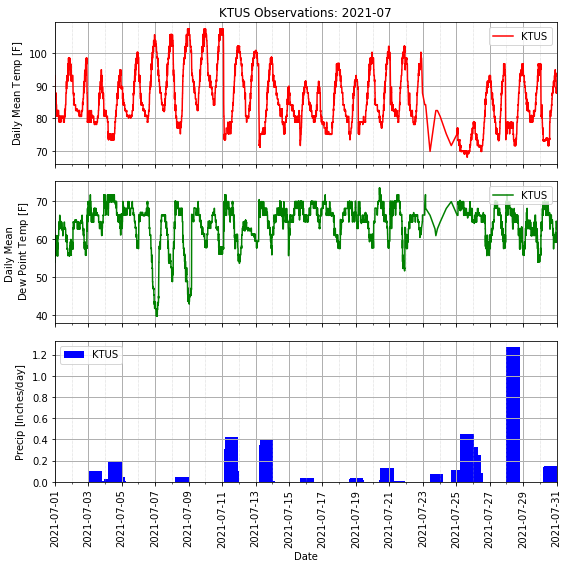

In [11]:
# Make a plot similar to the Pandas script
# set up the fig and axis, we'll make a panel plot with a shared x axis
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,8), sharex=True)

# set plotting dates
start = '2021-07-01'
end = '2021-07-31'

# on ax1 plot air temp data, no markers, solid line, red, with the KTUS label
ax1.plot(df.index, Air_Temp_F, marker="",linestyle='-',alpha=1.,color="Red",label="KTUS")
# put label/legend in top right =1
ax1.legend(loc=1)
# add major and minor gridlines
ax1.grid(which='major', linestyle='-', linewidth='1.0')
ax1.grid(which='minor', linestyle=':', linewidth='0.5')
# add y-axis label
ax1.set_ylabel('Daily Mean Temp [$\mathrm{F}$]') 
# set limits of y axis
#ax1.set_ylim(70,100)
# set title for the whole panel plot
ax1.set_title('KTUS Observations: 2021-07')

# same again but on ax2 and for dew point temp
ax2.plot(df.index,Dewpoint_Temp_F,marker="",linestyle='-',alpha=1.,color="Green",label="KTUS")
ax2.legend(loc=1)
ax2.grid(which='major', linestyle='-', linewidth='1.0')
ax2.grid(which='minor', linestyle=':', linewidth='0.5')
ax2.set_ylabel('Daily Mean \n Dew Point Temp [$\mathrm{F}$]') 
#ax2.set_ylim(55,70)

# plot daily precip as a bar plot, align it at the edge so bar it to the right of tick, 
ax3.bar(df.index, Precip_1Hour_Accum_Inches, 
        align='edge',alpha=1.,color="Blue",label="KTUS")
ax3.legend(loc=2)
ax3.grid(which='major', linestyle='-', linewidth='1.0')
ax3.grid(which='minor', linestyle=':', linewidth='0.5')
ax3.set_ylabel('Precip [$\mathrm{Inches/day}$]') 
#ax3.set_ylim(0,1.4)

# formatting of x-axis dates, rotate them 90 degrees 
fig.autofmt_xdate(rotation=90, ha='center')
# put a label every two days
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=2))
# but make sure minor ticks show each day
ax3.get_xaxis().set_minor_locator(mdates.DayLocator())
# set label and limits
ax3.set_xlabel('Date')
ax3.set_xlim(start,end)

# name, save and show the plot
plotfile = 'KTUS_July_21_timeseries_from_NumPy_lists.png'
plt.tight_layout()
sf = fig.savefig(plotfile, dpi=300)
plt.show()
plt.close()